In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("data_cleaned.csv", index_col=0)

In [3]:
# split X, y into test and training data
X = data.drop(columns="price")           
y = data["price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [4]:
# KNN Regression
# Compare weights
knn_scores_uni = []
for i in range(1, 21):
    neigh = KNeighborsRegressor(n_neighbors=i, weights='uniform')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    score = r2_score(y_test, y_pred)
    knn_scores_uni.append(score)

print(knn_scores_uni)

[0.6771533813207116, 0.7423164348665483, 0.762184485603058, 0.7696784048282046, 0.7689204456494585, 0.77064013190808, 0.7657258400970299, 0.7654691164144575, 0.7633699684169819, 0.7629674041469756, 0.7601929605260765, 0.7563287892037012, 0.7528738039797948, 0.7479372779026245, 0.7455639431949878, 0.7428080806905009, 0.7384128102162596, 0.7357346701015888, 0.7336357799618087, 0.7307820016582713]


In [5]:
knn_scores_dis = []
for i in range(1, 21):
    neigh = KNeighborsRegressor(n_neighbors=i,weights='distance')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    score = r2_score(y_test, y_pred)
    knn_scores_dis.append(score)

print(knn_scores_dis)   

[0.6771533813207116, 0.7346720907466061, 0.7561608146298681, 0.7647152481092814, 0.7681603668329994, 0.7712996806194963, 0.7716098932405218, 0.772586391408385, 0.7724092615629237, 0.7726494238143676, 0.7721814701386185, 0.7712288799340028, 0.7707621476167096, 0.7701161343723419, 0.7699335736546078, 0.7695162034822525, 0.7686013215940174, 0.7680280112301514, 0.7675501213546306, 0.7670258185255877]


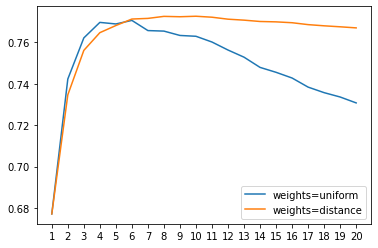

In [6]:
x = range(1, 21)
plt.plot(x, knn_scores_uni, label="weights=uniform")
plt.plot(x, knn_scores_dis, label="weights=distance")
plt.xticks(x)
plt.legend()
plt.show()

In [11]:
print("max score for uniform weights: " + str(max(knn_scores_uni)))
print("max score for distance weights: " + str(max(knn_scores_dis)))

max score for uniform weights: 0.77064013190808
max score for distance weights: 0.7726494238143676


In [7]:
# Compare algorithms
# kd_tree
knn_scores_dis_kd = []
for i in range(1, 21):
    neigh = KNeighborsRegressor(n_neighbors=i,weights='distance',algorithm='kd_tree')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    score = r2_score(y_test, y_pred)
    knn_scores_dis_kd.append(score)

print(knn_scores_dis_kd)

[0.6775073214191915, 0.7347296357722631, 0.7562798282704316, 0.7645608582761281, 0.7681317232746236, 0.7713060736745758, 0.7715833141081907, 0.7726275846318379, 0.7724005489510456, 0.7726169370773084, 0.7721678263323772, 0.7712690953388357, 0.7707534305463526, 0.7701142616470447, 0.769955914476589, 0.76943490503357, 0.7685874447565293, 0.7680463181425706, 0.7675509216404219, 0.7670217335415217]


In [8]:
# ball_tree
knn_scores_dis_ball = []
for i in range(1, 21):
    neigh = KNeighborsRegressor(n_neighbors=i, weights='distance',algorithm='ball_tree')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    score = r2_score(y_test, y_pred)
    knn_scores_dis_ball.append(score)
    
print(knn_scores_dis_ball)

[0.6775095782707479, 0.7347247221706612, 0.7562348494955233, 0.7645719715702651, 0.7681793461982882, 0.771277202643025, 0.7715972567827093, 0.7726411465823341, 0.7724339441124524, 0.7726189474853924, 0.7722197211559296, 0.7712560725824396, 0.7707733176791345, 0.7701056238094396, 0.7699660309172404, 0.7695248722201709, 0.7685868675402712, 0.7680592207996761, 0.7675380745792507, 0.7670219604949771]


In [9]:
# brute force
knn_scores_dis_brute = []
for i in range(1, 21):
    neigh = KNeighborsRegressor(n_neighbors=i, weights='distance',algorithm='brute')
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_test)
    score = r2_score(y_test, y_pred)
    knn_scores_dis_brute.append(score)

print(knn_scores_dis_brute)

[0.6771533813207116, 0.7346720907466061, 0.7561608146298681, 0.7647152481092814, 0.7681603668329994, 0.7712996806194963, 0.7716098932405218, 0.772586391408385, 0.7724092615629237, 0.7726494238143676, 0.7721814701386185, 0.7712288799340028, 0.7707621476167096, 0.7701161343723419, 0.7699335736546078, 0.7695162034822525, 0.7686013215940174, 0.7680280112301514, 0.7675501213546306, 0.7670258185255877]


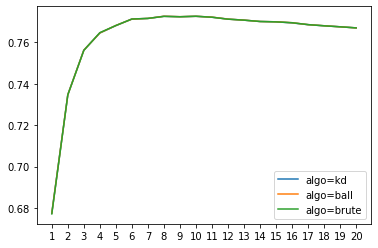

In [10]:
x = range(1, 21)
plt.plot(x, knn_scores_dis_kd, label="algo=kd")
plt.plot(x, knn_scores_dis_ball, label="algo=ball")
plt.plot(x, knn_scores_dis_brute, label="algo=brute")
plt.xticks(x)
plt.legend()
plt.show()